In [1]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("lastfm.csv")

In [5]:
#viewing the data
df

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
...,...,...,...,...
289950,19718,bob dylan,f,Canada
289951,19718,pixies,f,Canada
289952,19718,the clash,f,Canada
289953,19718,a tribe called quest,f,Canada


In [11]:
#Checking for count of missing data in the data frame
df[df.isnull()].count()

user       0
artist     0
sex        0
country    0
dtype: int64

In [14]:
#Checking for percentage of missing data in the data frame
for col in df.columns:
    pct_missing=np.mean(df[col].isnull())
    print("{} - {}%".format(col,pct_missing))

user - 0.0%
artist - 0.0%
sex - 0.0%
country - 0.0%


In [23]:
#Making all the data in the dataframe visible so i can explore the data then changed it back to the normal form 
pd.set_option("display.max_rows",10)

In [25]:
df

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
...,...,...,...,...
289950,19718,bob dylan,f,Canada
289951,19718,pixies,f,Canada
289952,19718,the clash,f,Canada
289953,19718,a tribe called quest,f,Canada


In [21]:
#Checking the data types of the dataset
df.dtypes

user        int64
artist     object
sex        object
country    object
dtype: object

In [34]:
#Sorting the dataframe by country in alphabetical order
df=df.sort_values(by="country",ignore_index=True)

In [35]:
df

,user,artist,sex,country
0,2131,trivium,m,Afghanistan
1,2131,as i lay dying,m,Afghanistan
2,8944,alicia keys,f,Afghanistan
3,2131,nickelback,m,Afghanistan
4,2131,the smiths,m,Afghanistan
...,...,...,...,...
289950,14301,andrew lloyd webber,m,Zimbabwe
289951,14301,eagles,m,Zimbabwe
289952,19058,girl talk,m,Zimbabwe
289953,4839,pink floyd,f,Zimbabwe


In [44]:
#Drop duplicates 2 duplicates found and deleted
df=df.drop_duplicates()

In [55]:
df.head()

,user,artist,sex,country
0,2131,trivium,m,Afghanistan
1,2131,as i lay dying,m,Afghanistan
2,8944,alicia keys,f,Afghanistan
3,2131,nickelback,m,Afghanistan
4,2131,the smiths,m,Afghanistan


In [60]:
#Sum of users by Countries
df_countries=df.groupby("country")
pd.set_option("display.max_rows",None)
df_countries=df_countries.sum().reset_index()
df_countries


,country,user
0,Afghanistan,292632
1,Albania,845151
2,Algeria,490500
3,American Samoa,102944
4,Andorra,480489
5,Angola,123082
6,Antarctica,2657462
7,Antigua and Barbuda,30336
8,Argentina,19718047
9,Armenia,92421


In [70]:
#Total Number of users
df["user"].sum()

2856753436

In [68]:
#Top 5 countries with highest number of users
Top_5=df_countries.sort_values(by="user", ascending= False, ignore_index=True).head()
Top_5

,country,user
0,United States,584413406
1,United Kingdom,278886801
2,Germany,241624011
3,Poland,167596979
4,Sweden,118661535


Text(0, 0.5, 'User')

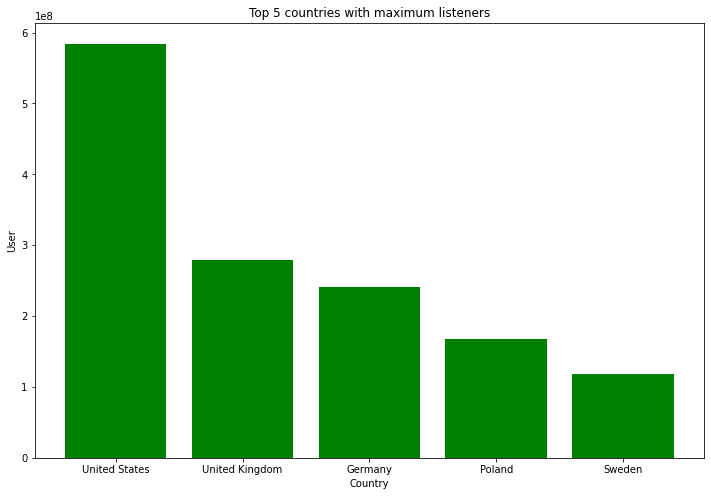

In [121]:
#Visualization of the Top 5 countries with the maximum listeners
plt.figure(figsize=(12,8))
plt.bar(Top_5["country"],Top_5["user"],color="green")
plt.title("Top 5 countries with maximum listeners")
plt.xlabel("Country")
plt.ylabel("User")

In [69]:
#Last 5 countries with lowest number of users
last_5=df_countries.sort_values(by="user", ascending= False, ignore_index=True).tail()
last_5

,country,user
154,Antigua and Barbuda,30336
155,Tokelau,27216
156,Brunei Darussalam,25140
157,Togo,9031
158,Syrian Arab Republic,2090


Text(0, 0.5, 'User')

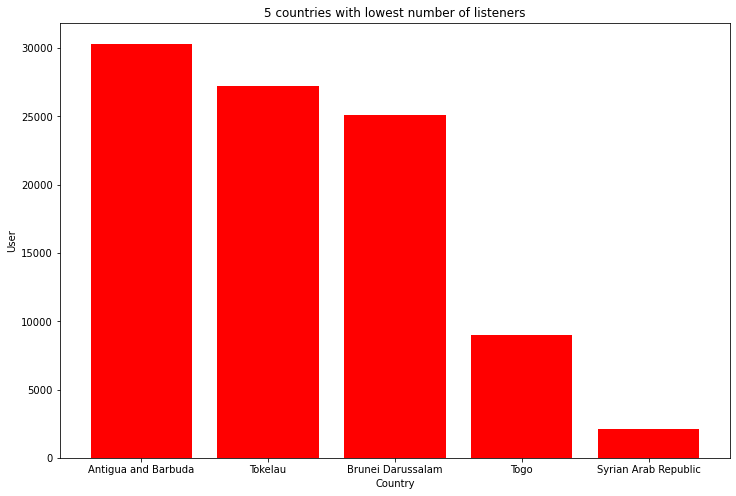

In [124]:
#Visualization of the 5 countries with the minimum number of listeners
plt.figure(figsize=(12,8))
plt.bar(last_5["country"],last_5["user"],color="red")
plt.title("5 countries with lowest number of listeners")
plt.xlabel("Country")
plt.ylabel("User")

In [80]:
#Find the total number of radio listeners in china
china=df[df["country"]=="China"]
china["user"].sum()


6147503

In [90]:
#Find the artist with maximum number of listeners in United States
usa=df[df["country"]=="United States"]
usa.sort_values(by="user", ascending=False, ignore_index=True).head(20)
#the first 11 artists have the same number of users so it is a tie

,user,artist,sex,country
0,19701,ladytron,f,United States
1,19701,the smashing pumpkins,f,United States
2,19701,animal collective,f,United States
3,19701,crystal castles,f,United States
4,19701,the knife,f,United States
5,19701,broken social scene,f,United States
6,19701,placebo,f,United States
7,19701,tegan and sara,f,United States
8,19701,beck,f,United States
9,19701,beirut,f,United States


In [99]:
#Filter the artists with users from Poland that are greater than 19700
Poland=df[df["country"]=="Poland"]
Poland[Poland["user"]>19700]

,user,artist,sex,country
148280,19703,the cure,f,Poland
148281,19703,queens of the stone age,f,Poland
148282,19703,red hot chili peppers,f,Poland
148283,19703,marilyn manson,f,Poland
148284,19703,porcupine tree,f,Poland
148285,19703,mindless self indulgence,f,Poland
148286,19703,velvet revolver,f,Poland
148287,19703,interpol,f,Poland
148288,19703,nirvana,f,Poland
148289,19703,against me!,f,Poland


In [110]:
#Find the gender majority that listens to 2PAC
pac=df[df["artist"]=="2pac"]
pac.groupby("sex").sum()

,user
sex,
f,336355
m,3008164


In [113]:
#Find the artist with the highest listeners in Nigeria
df[df["country"]=="Nigeria"].sort_values(by="user",ascending=False,ignore_index=True)

,user,artist,sex,country
0,11762,sting,m,Nigeria
1,11762,michael jackson,m,Nigeria
2,11762,herbie hancock,m,Nigeria
3,8290,jay-z,m,Nigeria
4,8290,akon,m,Nigeria
5,8290,eminem,m,Nigeria
6,8290,lady gaga,m,Nigeria
7,8290,james blunt,m,Nigeria
8,8290,the cranberries,m,Nigeria
